In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
data_info = pd.read_csv(r"C:\Users\yioko\Downloads\Datasets\Udemy TF and Keras\TF_2_Notebooks_and_Data\DATA\lending_club_info.csv",
                       index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
df = pd.read_csv(r"C:\Users\yioko\Downloads\Datasets\Udemy TF and Keras\TF_2_Notebooks_and_Data\DATA\lending_club_loan_two.csv")

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# EDA

<AxesSubplot: xlabel='loan_status', ylabel='count'>

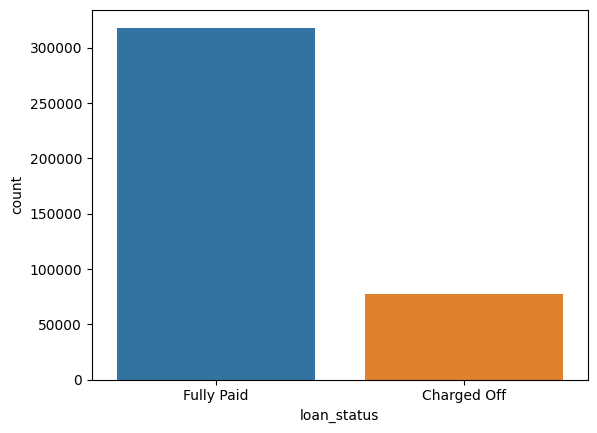

In [9]:
sns.countplot(x='loan_status',data=df)

## Histogram of the loan_amnt column

<AxesSubplot: xlabel='loan_amnt', ylabel='Count'>

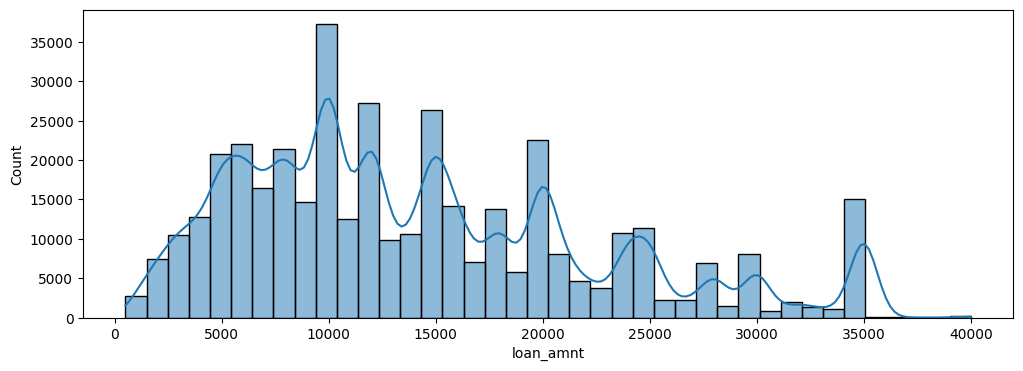

In [10]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'], kde=True , bins=40)

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

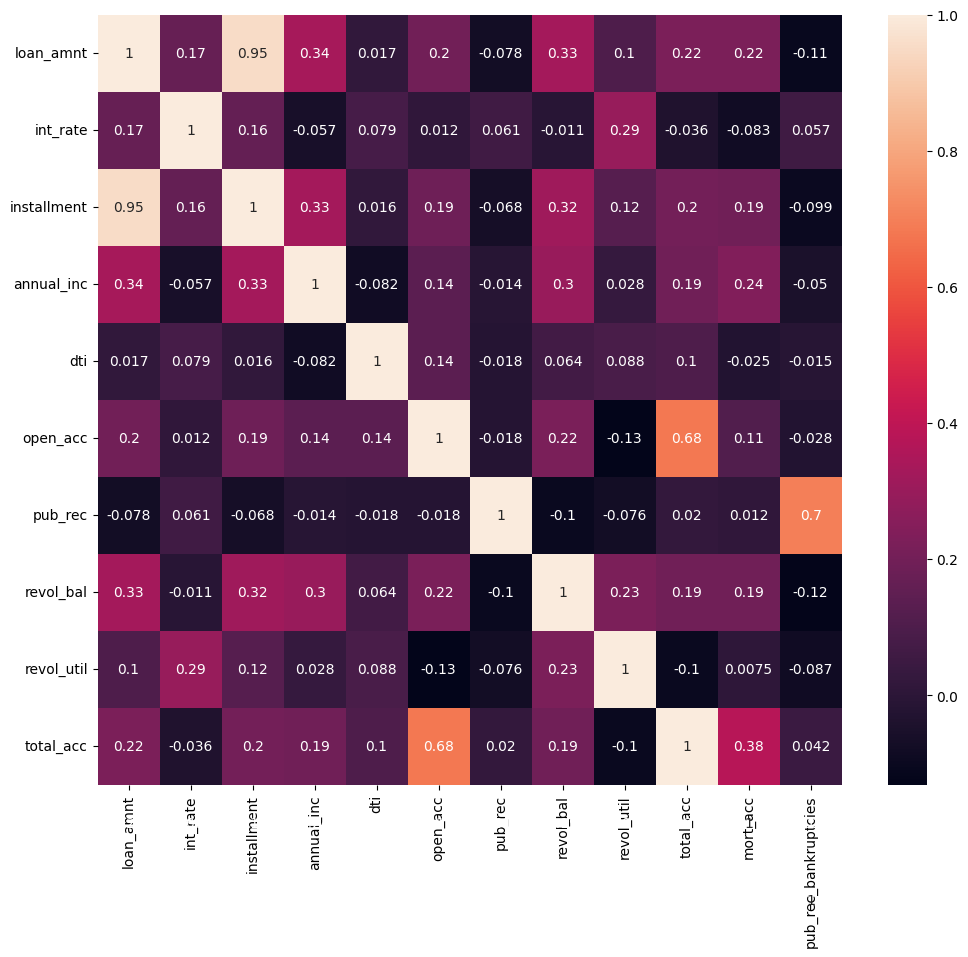

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.ylim(10,0)

In [13]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [14]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot: xlabel='installment', ylabel='loan_amnt'>

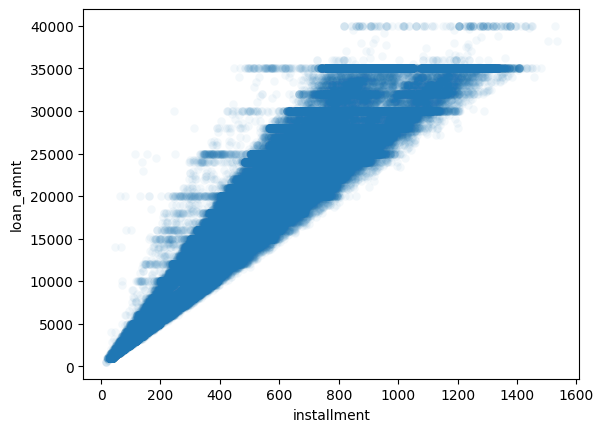

In [15]:
sns.scatterplot(x='installment', y='loan_amnt', data=df, alpha = 0.05, linewidth=0)

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

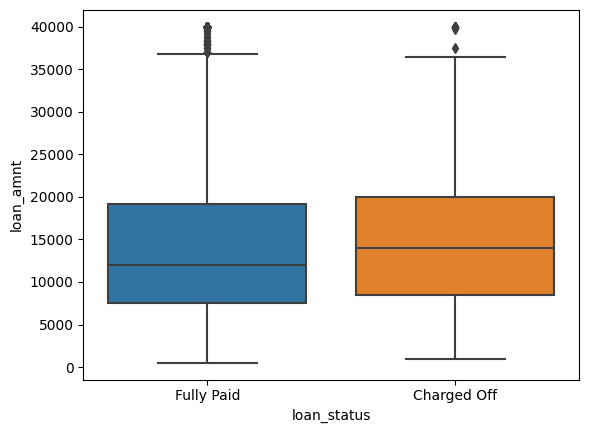

In [16]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

<AxesSubplot: xlabel='loan_amnt', ylabel='Count'>

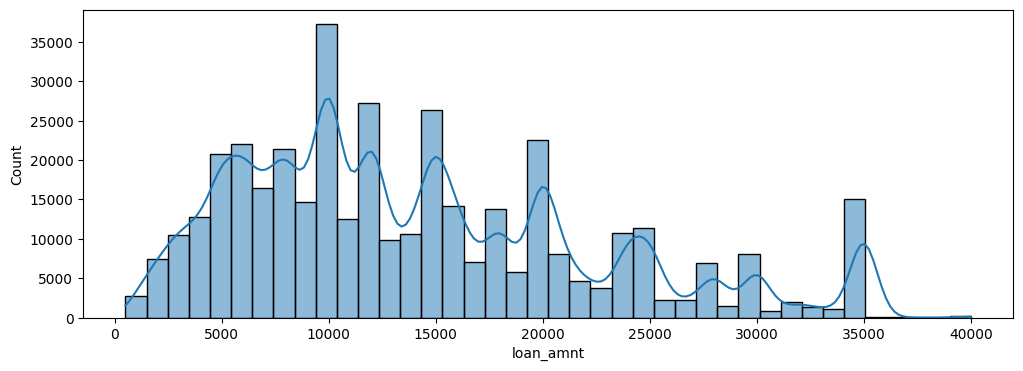

In [17]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'],bins = 40, kde= True)

In [18]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot: >

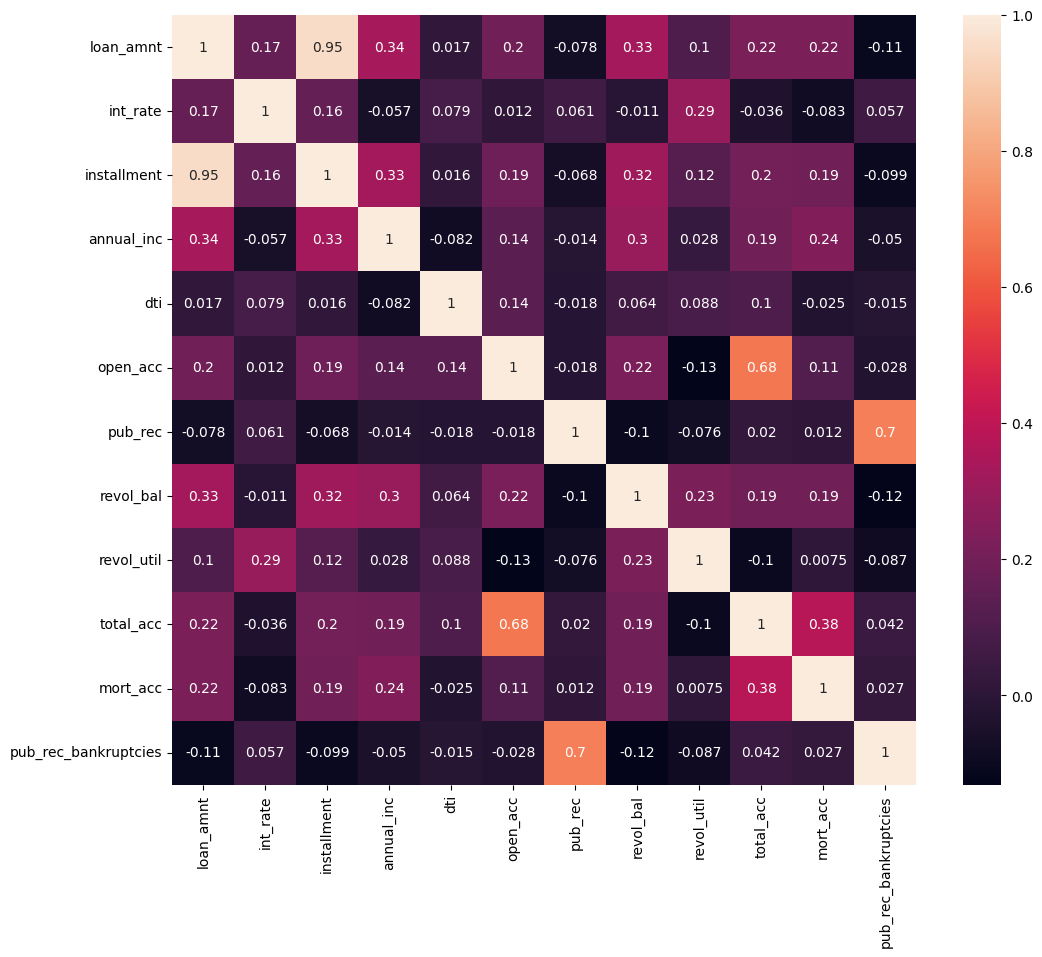

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [20]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [21]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot: xlabel='installment', ylabel='loan_amnt'>

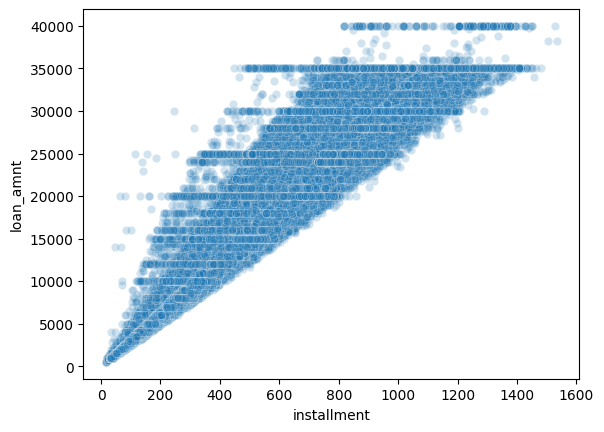

In [22]:
sns.scatterplot(x='installment', y='loan_amnt', data = df, alpha = 0.2)

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

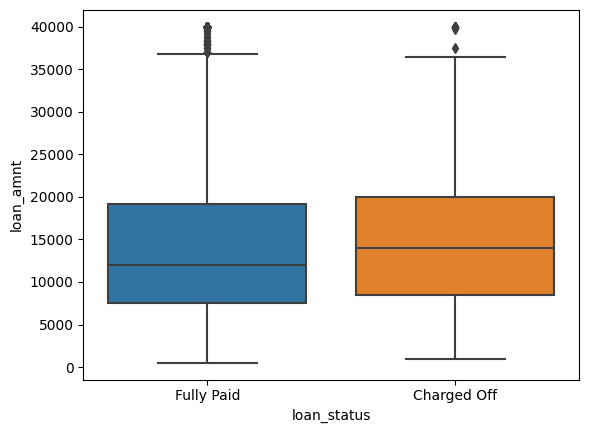

In [23]:
sns.boxplot(x='loan_status', y='loan_amnt', data = df)

In [24]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [25]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [26]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [27]:
feat_info('sub_grade')

LC assigned loan subgrade


<AxesSubplot: xlabel='grade', ylabel='count'>

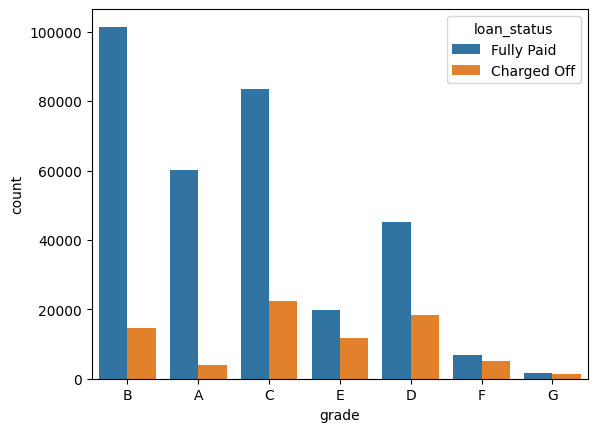

In [28]:
sns.countplot(x='grade', data=df, hue='loan_status')

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

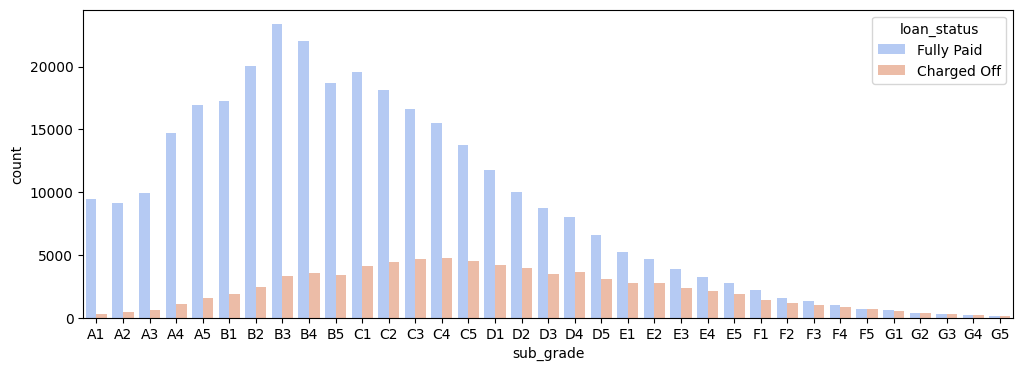

In [29]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order= subgrade_order, palette='coolwarm', hue= 'loan_status')

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

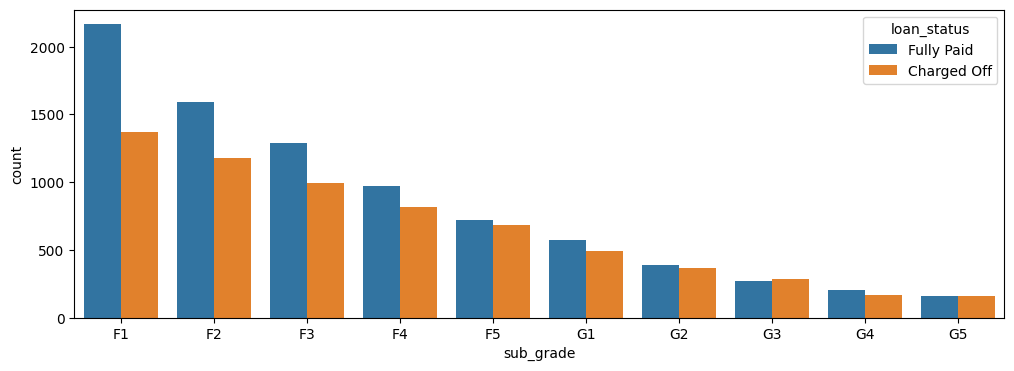

In [30]:
f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F') ]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, order= subgrade_order, hue= 'loan_status')

In [31]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [32]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot: >

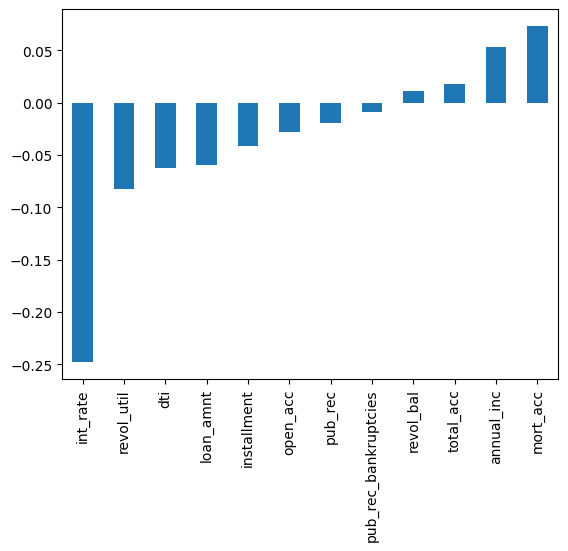

In [33]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [34]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [35]:
len(df)

396030

In [36]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [37]:
(100 * df.isnull().sum() / len(df)).round(2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
loan_repaid             0.00
dtype: float64

In [38]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [39]:
df['emp_title'].nunique()

173105

In [40]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [41]:
df = df.drop('emp_title',axis=1)

In [42]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [43]:
emp_length_order = [
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot: xlabel='emp_length', ylabel='count'>

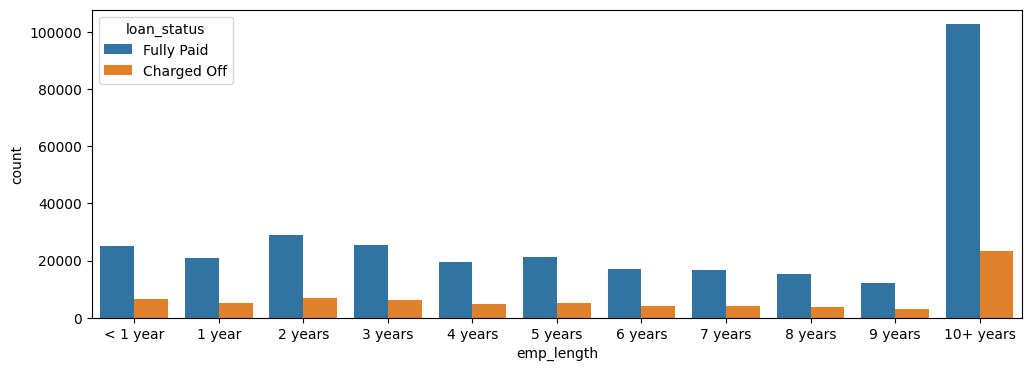

In [44]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data = df, order = emp_length_order,
             hue = 'loan_status')

In [45]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [46]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

<AxesSubplot: xlabel='emp_length'>

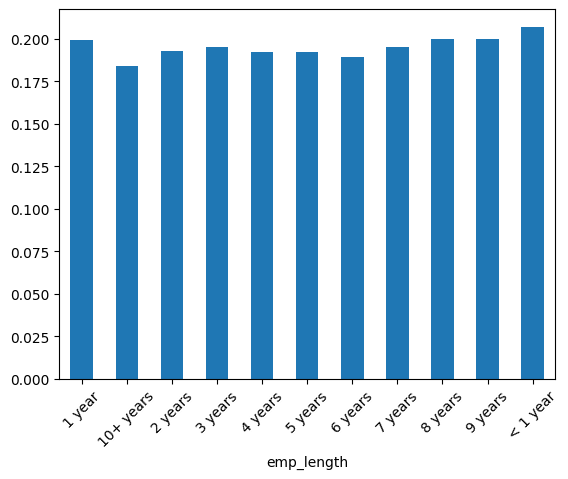

In [47]:
emp_len = (emp_co /(emp_co +  emp_fp)).round(3)
emp_len.plot(kind='bar', rot=45)

In [48]:
df = df.drop('emp_length', axis=1)

In [49]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [50]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [51]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [52]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [53]:
feat_info('title')

The loan title provided by the borrower


In [54]:
df = df.drop('title', axis=1)

In [55]:
feat_info('mort_acc')

Number of mortgage accounts.


<AxesSubplot: >

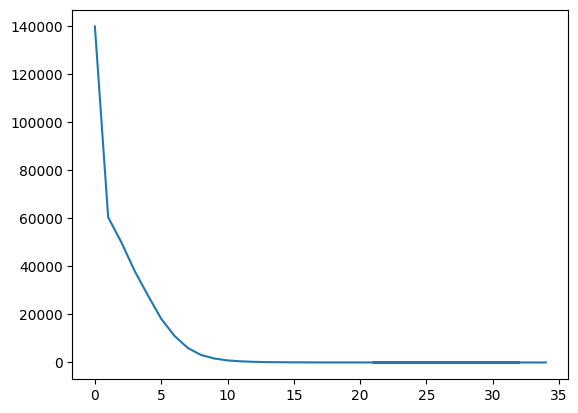

In [56]:
(df['mort_acc'].value_counts()).plot()

In [57]:
df['mort_acc'].value_counts().head()

0.0    139777
1.0     60416
2.0     49948
3.0     38049
4.0     27887
Name: mort_acc, dtype: int64

In [58]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [59]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [60]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [62]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']), axis = 1)

In [63]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [64]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [65]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [66]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [67]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [72]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

TypeError: 'int' object is not subscriptable

In [73]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [75]:
df = df.drop('grade', axis=1)

In [77]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

In [78]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [82]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1), dummies], axis=1)

In [83]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [84]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [85]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [86]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [87]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

In [90]:
df['zipcode'] = df['address'].apply(lambda address:address[-5:])

In [96]:
df['zipcode'].value_counts().nunique()

10

In [97]:
dummies = pd.get_dummies(df['zipcode'], drop_first=True)

df = pd.concat([df.drop('zipcode', axis=1), dummies], axis=1)

In [98]:
df = df.drop('address', axis =1 )

In [99]:
feat_info('issue_d')

The month which the loan was funded


In [102]:
df = df.drop('issue_d', axis = 1 )

In [104]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [106]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [109]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

## Data Preprocessing

In [111]:
df = df.drop('loan_status', axis = 1)

In [112]:
X = df.drop('loan_repaid', axis = 1).values

In [113]:
y = df['loan_repaid'].values

In [114]:
len(df)

395219

## Normalize the Data

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [117]:
scaler = MinMaxScaler()

In [119]:
X_train = scaler.fit_transform(X_train)

In [120]:
X_test = scaler.transform(X_test)

## Creating and Training a Model

In [172]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1, activation = 'sigmoid'))
          
model.compile(loss='binary_crossentropy', optimizer='adam')

In [173]:
X_train.shape

(316175, 78)

In [174]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/145
618/618 [==============================] - 2s 2ms/step - loss: 0.3661 - val_loss: 0.2687
Epoch 2/145
618/618 [==============================] - 1s 2ms/step - loss: 0.2796 - val_loss: 0.2660
Epoch 3/145
618/618 [==============================] - 1s 2ms/step - loss: 0.2729 - val_loss: 0.2641
Epoch 4/145
618/618 [==============================] - 1s 2ms/step - loss: 0.2698 - val_loss: 0.2640
Epoch 5/145
618/618 [==============================] - 1s 2ms/step - loss: 0.2683 - val_loss: 0.2637
Epoch 6/145
618/618 [==============================] - 1s 2ms/step - loss: 0.2673 - val_loss: 0.2633
Epoch 7/145
618/618 [==============================] - 1s 2ms/step - loss: 0.2668 - val_loss: 0.2626
Epoch 8/145
618/618 [==============================] - 1s 2ms/step - loss: 0.2660 - val_loss: 0.2635
Epoch 9/145
618/618 [==============================] - 1s 2ms/step - loss: 0.2657 - val_loss: 0.2629
Epoch 10/145
618/618 [==============================] - 1s 2ms/step - loss: 0.2654 - val_lo

## Saving the model

In [129]:
#from tensorflow.keras.model import load_model

#model.save('model_for_loans.h5')

## Model Evaluation

<AxesSubplot: >

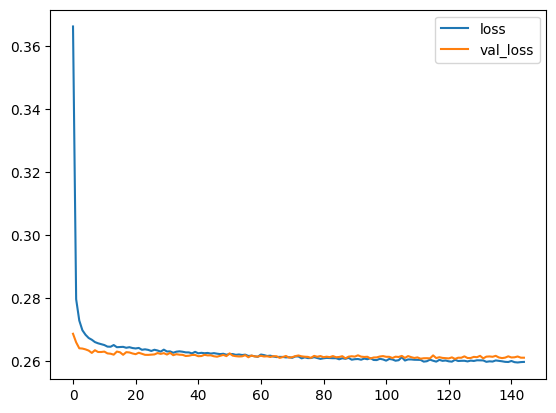

In [175]:
losses = pd.DataFrame(model.history.history)
losses.plot()

<AxesSubplot: >

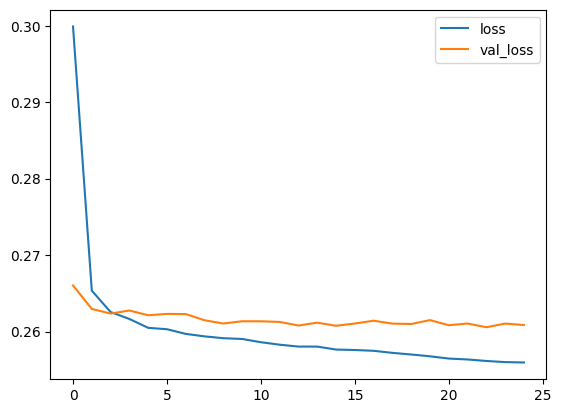

In [131]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [137]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [176]:
predictions = model.predict(X_test)

2471/2471 [==============================] - 1s 534us/step


In [177]:
print(classification_report(y_test, predictions.round()))

#accuracy_score(y_test, predictions.round(), normalize=False)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [143]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [149]:
#Even if the model choose only the (1) "repaid_loans" it would be 80.3% accuracy

100*(317696 / len(df))

80.38479931379817

In [178]:
confusion_matrix(y_test, predictions.round())

array([[ 6729,  8929],
       [   12, 63374]], dtype=int64)

## Given the customer below, would you offer this person a loan?

In [152]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid', axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [155]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [162]:
model.predict(new_customer).round()

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

In [160]:
df.iloc[random_ind]['loan_repaid']

1.0

# Tensorboard

### Data

In [1]:
pwd

'C:\\Users\\yioko\\PycharmProjects\\pythonProject1'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\yioko\Downloads\Datasets\Udemy TF and Keras\TF_2_Notebooks_and_Data\DATA\cancer_classification.csv")

### Train Test Split

In [4]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Scaling Data

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(X_train, y_train)

MinMaxScaler()

In [11]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [14]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [15]:
pwd

'C:\\Users\\yioko\\PycharmProjects\\pythonProject1'

## Creating the Tensorboard Callback

In [16]:
from datetime import datetime

In [17]:
datetime.now().strftime('%Y-%m-%d--%H%M')

'2022-12-21--1511'

In [18]:
log_directory = 'logs\\fit'

board = TensorBoard(log_dir = log_directory, histogram_freq =1,
                   write_graph=True,
                   write_images=True,
                   update_freq='epoch',
                   profile_batch=2,
                   embeddings_freq=1)

### Creating the model layers 

In [19]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

## Train the model

In [20]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop, board]
          )

Epoch 1/600
14/14 [==============================] - 3s 30ms/step - loss: 0.7186 - val_loss: 0.6593
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6860 - val_loss: 0.6383
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6522 - val_loss: 0.6154
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6480 - val_loss: 0.5899
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6054 - val_loss: 0.5604
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5800 - val_loss: 0.5272
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5520 - val_loss: 0.4978
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5510 - val_loss: 0.4726
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5098 - val_loss: 0.4489
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5161 - val_loss: 0.4238
Epoch 11

## Running Tensorboard
### Through the Command Line

In [21]:
print(log_directory)

logs\fit


In [22]:
pwd

'C:\\Users\\yioko\\PycharmProjects\\pythonProject1'